In [54]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from __future__ import division

In [55]:
import requests

In [56]:
from io import StringIO

In [74]:
df = pd.read_csv("2012-general-election-romney-vs-obama.csv")
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             590 non-null    ob

In [85]:
df = df.drop(['Question Text'], axis=1) # low correlation
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


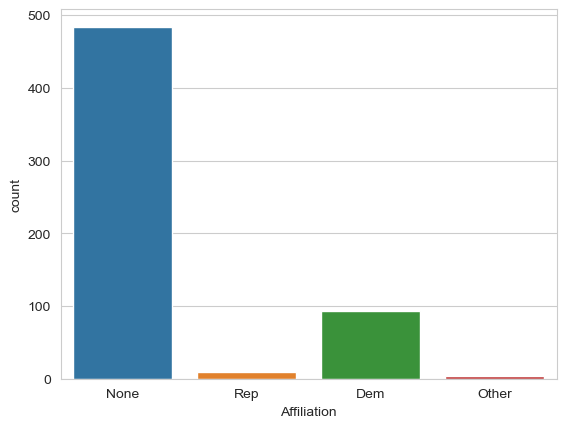

In [86]:
sns.countplot(x='Affiliation', data=df)
plt.show()

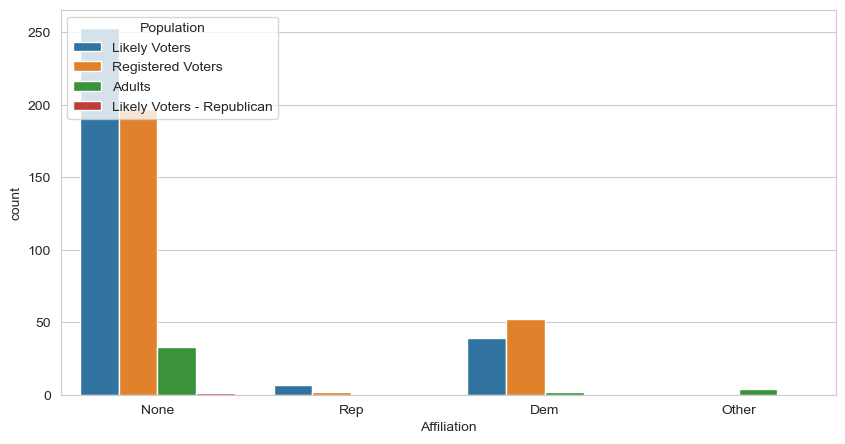

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='Affiliation', data=df, hue= "Population")
plt.show()

In [88]:
avg = pd.DataFrame(df.mean())
avg.drop('Number of Observations', axis=0, inplace = True)

C:\Users\mhose\AppData\Local\Temp\ipykernel_11556\3235159094.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(df.mean())


In [89]:
avg.head()

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990
Question Iteration,1.000000


In [90]:
std = pd.DataFrame(df.std())
std.drop('Number of Observations', axis=0,inplace=True)

C:\Users\mhose\AppData\Local\Temp\ipykernel_11556\400314919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = pd.DataFrame(df.std())


In [91]:
std.head()

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318
Question Iteration,0.000000


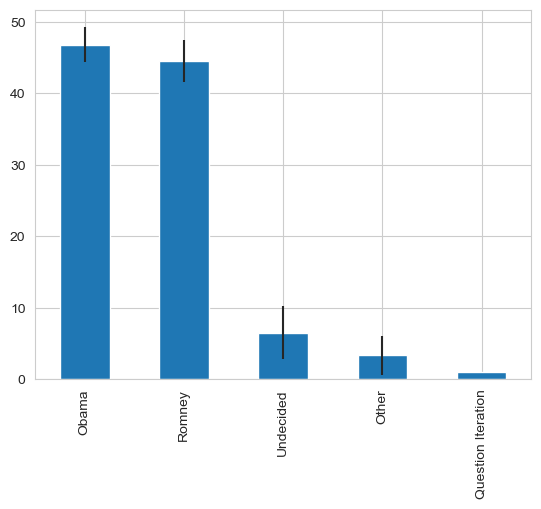

In [92]:
avg.plot(yerr=std,kind='bar', legend=False)
plt.show()

In [94]:
df_avg = pd.concat([avg, std], axis=1)
df_avg.columns = ['Average', 'STD']

In [95]:
df_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Question Iteration,1.000000,0.000000


In [96]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


In [97]:
df = df.drop(["Source URL", "Pollster URL"], axis=1)

In [98]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,Nonpartisan,None,1


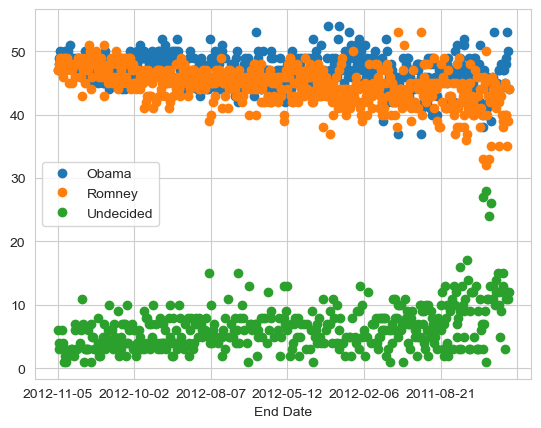

In [99]:
df.plot(x='End Date', y=["Obama", "Romney", 'Undecided'], linestyle="", marker='o')
plt.show()

In [100]:
from datetime import datetime

In [101]:
df['Difference'] = (df.Obama - df.Romney)/100
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Partisan,Affiliation,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,Nonpartisan,None,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,Nonpartisan,None,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,Nonpartisan,None,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,Nonpartisan,None,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,Nonpartisan,None,1,-0.01


In [102]:
df = df.groupby(['Start Date'], as_index= False).mean()

df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,1.0,0.09


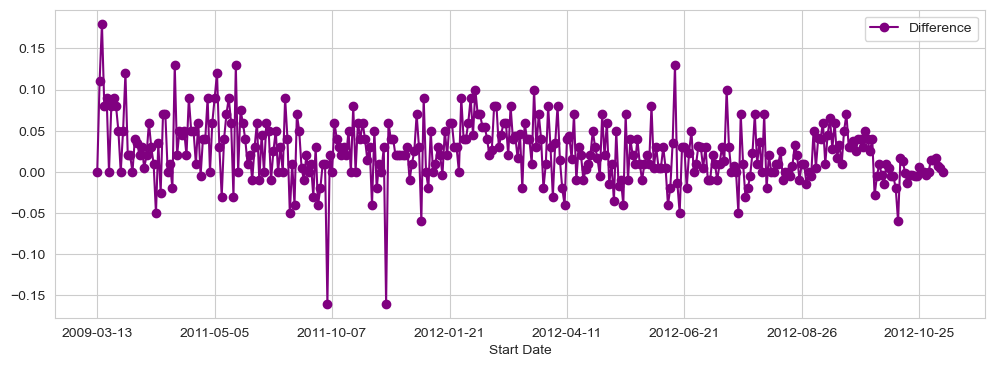

In [103]:
df.plot('Start Date', "Difference", figsize=(12,4), marker="o", linestyle="-", color='purple')
plt.show()

In [106]:
row_in = 0
xlimit= []

for date in df['Start Date']:
    if date[0:7] =="2012-10":
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in +=1
        
print(min(xlimit))
print(max(xlimit))

329
356


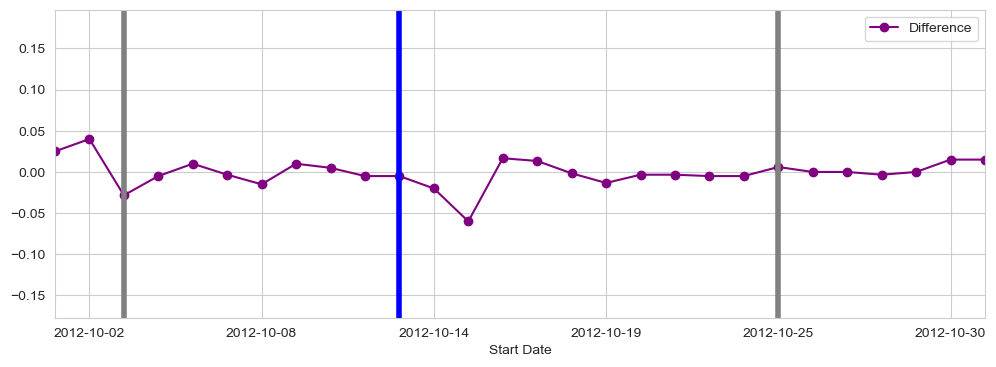

In [112]:
df.plot('Start Date', "Difference", figsize=(12,4), marker="o", linestyle="-", color='purple', xlim=(329,356))
#oct 3rd
plt.axvline(x=329+2, linewidth=4, color='grey')
#oct 11th
plt.axvline(x=329+10, linewidth=4, color='blue')
#oct 22nd
plt.axvline(x=329+21, linewidth=4, color='grey')
plt.show()